# Statistical Learning
---

## Contents
- [Linear Regression](#linreg)
- [Simple Linear Regression](#simlinreg)
    - [Estimating the coefficients](#estcoef)
    - [Assessing the Accuracy of the Coefficient Estimates](#assacc)
    - [Assessing the Model Accuracy](#modelacc)
- [Multiple Linear Regression](#mulreg)

<a name="linreg"></a>
## Linear Regression

Consider the **Advertising** dataset. It displays *sales* of a particular product
as a function of advertising budgets for *TV*, *radio* and *newspaper* media.
Here are a few important questions that we might seek to address:
- Is there a relationship between advertising budget and sales?
- How strong is the relationship between advertising budget and sales?
- Which media contribute to sales?
- How accurately can we estimate the effect of each medium on sales?
- How accurately can we predict future sales?
- Is the relationship linear?
- Is there synergy/interaction among the advertising media?

<a name="simlinreg"></a>
## Simple Linear Regression

It is a very straightforward approach for predicting a quantitative response Y on the basis of a single predictor variable $X$. It assumes that there is approximately a linear relationship between $X$ and $Y$. Mathematically, we can write this linear relationship as
$$Y \approx \beta_{0} + \beta_{1}X$$
where $\beta_{0}$ is the intercept and $\beta_{1}$ is the slope term in linear model.
They are known as model *coefficients* or *parameters*.
Suppose, *sales* regresses onto *TV*, it can be written as
$$sales \approx \beta_{0} + \beta_{1} \times TV$$
Once we have our training data to produce estimates $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ for the model coefficients,
we predict the future sales on the basis of particular value of TV advertising by computing
$$\hat{y} = \hat{\beta_{0}} + \hat{\beta_{1}}x$$
where $\hat{y}$ is the prediction of $Y$ on the basis of $X = x$.
We use $\hat{}$ to denote the estimated value for an unknown parameter or coefficient, or to denote the predicted value of the response.

<a name="estcoef"></a>
### Estimating the coefficients

In practice, $\beta_{0}$ and $\beta_{1}$ are unknown.
Our goal is to obtain coefficient estimates $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ such that the linear model
$y_{i} \approx \hat{\beta_{0}} + \hat{\beta_{1}}x_{i}$ for $i = 1, \cdots, n$ fits the available data well.
In other words, we want to find an intercept $\hat{\beta_{0}}$ and slope $\hat{\beta_{1}}$ such that the resulting line is as close as possible to the $n$ data points.

Let $\hat{y_{i}} = \hat{\beta_{0}} + \hat{\beta_{1}}x_{i}$ be the prediction for $Y$ based on the $i^{th}$ value of $X$.
Then $e_{i} = y_{i} - \hat{y_{i}}$ represents the $i^{th}$ residual. Thus the *residual sum of squares (RSS)* is
$$RSS = {e_{1}}^{2} + {e_{2}}^{2} + \cdots + {e_{n}}^{2}$$
This is equivalent to
$$RSS = \left(y_{1} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{1}\right)^{2} +
        \left(y_{2} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{2}\right)^{2} +
        \cdots +
        \left(y_{n} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{n}\right)^{2}$$
The least squares approach chooses $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ to minimize the RSS which are given by
$$\hat{\beta_{1}} = \frac{\sum_{i = 1}^{n}\left(x_{i} - \bar{x}\right)\left(y_{i} - \bar{y}\right)}
                        {\sum_{i = 1}^{n}\left(x_{i} - \bar{x}\right)^{2}}$$

$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}}\bar{x}$$
where $$\bar{y} = \frac{1}{n}\sum_{i = 1}^{n}y_{i}$$ and $$\bar{x} = \frac{1}{n}\sum_{i = 1}^{n}x_{i}$$ are the sample means.
This defines the *least squares coefficient estimates* for simple linear regression.

For example, let's consider the Advertising dataset (we will be using R language):

In [1]:
adv <- read.csv('../../datasets/Advertising.csv')
adv

X,TV,radio,newspaper,sales
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8


We can drop the first column *X* as it consists only the indexes and is of no particular use to us

In [2]:
adv <- adv[-1]
head(adv)

TV,radio,newspaper,sales
<dbl>,<dbl>,<dbl>,<dbl>
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


Now, we want to regress *sales* over *TV* considering the linear relation as
$$sales \approx \hat{\beta_{0}} + \hat{\beta_{1}} \times TV$$
$\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ can be calculated as follows:

In [3]:
y <- adv$sales
x <- adv$TV
y.bar <- mean(y)
x.bar <- mean(x)

b1 <- sum((x - x.bar) * (y - y.bar)) / sum((x - x.bar)**2)
b0 <- y.bar - b1 * x.bar

paste('b0(intercept) == ', b0)
paste('b1(slope) == ', b1)

[1] "b0(intercept) ==  7.03259354912769"

[1] "b1(slope) ==  0.0475366404330197"

Here, *sales* are in *thousands of units* and *TV* refers to advertising budget in *thousands of dollars*.

Here, $\hat{\beta_{0}} = 7.03$ and $\hat{\beta_{1}} = 0.0475$.
In other words, according to this approximation, an additional \$1000 spent on *TV* advertising is associated with selling approximately 47.5 additional units of product. Spending \$0 on *TV* advertising will result in sale of 7030 units of product.

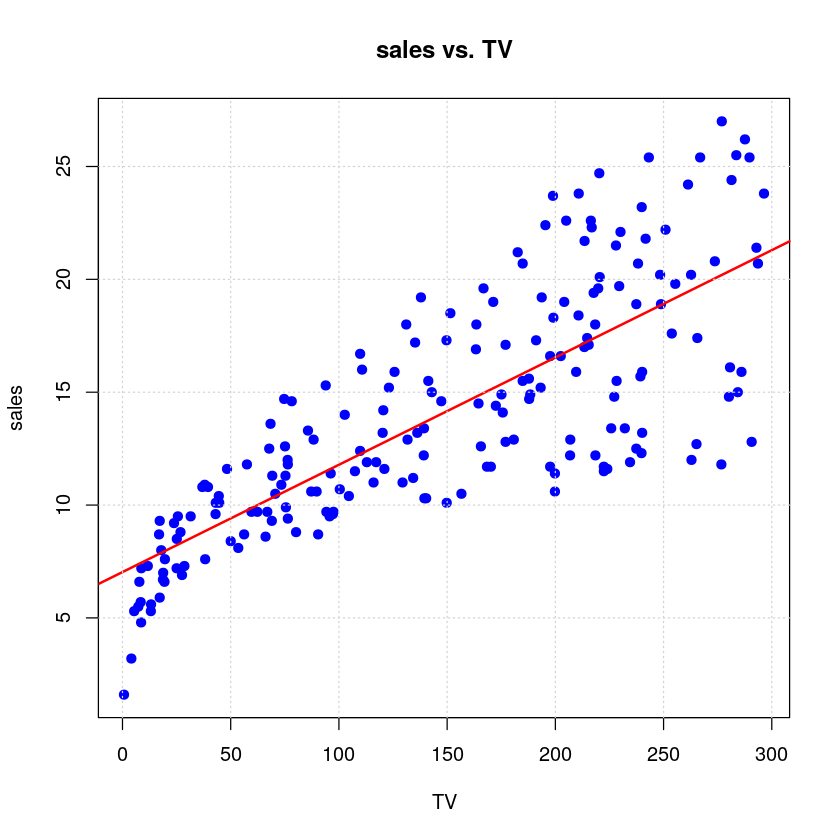

In [4]:
plot(x, y, pch = 19, col = 'blue', main ='sales vs. TV', xlab = 'TV', ylab = 'sales')
abline(b0, b1, lwd = 2, col = 'red')
grid()

The *residual sum of squares (RSS)* is

In [5]:
rss <- sum((y - b0 - b1 * x)**2)
print(rss)

[1] 2102.531


<a name="assacc"></a>
### Assessing the Accuracy of the Coefficient Estimates

We assume that the true relationship between $X$ and $Y$ takes the form $Y = f\left(X\right) + \epsilon$ for some unknown function $f$, where $\epsilon$ is a mean-zero random error term. If $f$ is to be approximated by a linear function, then we can write this relationship as:
$$Y = \beta_{0} + \beta_{1}X + \epsilon$$

Here $\beta_{0}$ is the intercept term — that is, the expected value of $Y$ when $X = 0$,
and $\beta_{1}$ is the slope — the average increase in $Y$ associated with a one-unit
increase in $X$. The error term is a catch-all for what we miss with this
simple model: the true relationship is probably not linear, there may be
other variables that cause variation in $Y$, and there may be measurement
error. We typically assume that the error term is independent of $X$.

The model defines the *population regression line*, which
is the best linear approximation to the true relationship between $X$ and
$Y$. The least squares regression coefficient estimates characterize the
*least squares line*.

The true relationship is generally not known for
real data, but the least squares line can always be computed using the
coefficient estimates. In real applications,
we have access to a set of observations from which we can compute the
least squares line; however, the population regression line is unobserved.

Different data sets generated from the same true
model result in slightly different least squares lines, but the unobserved
population regression line does not change.

At first glance, the difference between the population regression line and
the least squares line may seem subtle and confusing. We only have one
data set, and so what does it mean that two different lines describe the
relationship between the predictor and the response? Fundamentally, the
concept of these two lines is a natural extension of the standard statistical
approach of using information from a sample to estimate characteristics of a
large population. For example, suppose that we are interested in knowing
the population mean $\mu$ of some random variable $Y$. Unfortunately, $\mu$ is
unknown, but we do have access to $n$ observations from $Y$, which we can
write as $y_{1}, y_{2}, \cdots, y_{n}$, and which we can use to estimate $\mu$.
A reasonable estimate is $\mu = \bar{y}$, where
$\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_{i}$ is the sample mean. The sample
mean and the population mean are different, but in general the sample
mean will provide a good estimate of the population mean. In the same
way, the unknown coefficients $\beta_{0}$ and $\beta_{1}$ in linear regression define the
population regression line. We seek to estimate these unknown coefficients
using $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$. These coefficient estimates define the least
squares line.

The analogy between linear regression and estimation of the mean of a
random variable is an apt one based on the concept of *bias*. If we use the
sample mean $\hat{\mu}$ to estimate $\mu$, this estimate is *unbiased*, in the sense that
on average, we expect $\hat{\mu}$ to equal $\mu$. What exactly does this mean? It means
that on the basis of one particular set of observations $y_{1}, \cdots, y_{n}$, $\hat{\mu}$ might
overestimate $\mu$, and on the basis of another set of observations, $\hat{\mu}$ might
underestimate $\mu$. But if we could average a huge number of estimates of
$\mu$ obtained from a huge number of sets of observations, then this average
would *exactly* equal $\mu$. Hence, an unbiased estimator does not *systematically*
over- or under-estimate the true parameter. The property of unbiasedness
holds for the least squares coefficient estimates.
If we estimate $\beta_{0}$ and $\beta_{1}$ on the basis of a particular data set, then our
estimates won’t be exactly equal to $\beta_{0}$ and $\beta_{1}$. But if we could average
the estimates obtained over a huge number of data sets, then the average
of these estimates would be spot on.

We continue the analogy with the estimation of the population mean
$\mu$ of a random variable $Y$. A natural question is as follows: how accurate
is the sample mean $\hat{\mu}$ as an estimate of $\mu$?
We have established that the  average of $\hat{\mu}$'s over many data sets will be very close to $\mu$, but that a
single estimate $\hat{\mu}$ may be a substantial underestimate or overestimate of $\mu$.
How far off will that single estimate of $\hat{\mu}$ be?
This is computed by *standard error* of $\hat{\mu}$

$$Var\left(\hat{\mu}\right) = SE\left(\hat{\mu}\right)^{2} = \frac{\sigma^{2}}{n}$$

where $\sigma$ is the *standard deviation* of each $y_{i}$ of $Y$.
Roughly speaking, the standard error tells us the average amount that this
estimate $\hat{\mu}$ differs from the actual value of $\mu$. Also, the deviation shrinks with $n$.

Similarly,
$$SE\left(\hat{\beta_{0}}\right)^{2} = \sigma^{2}\left[\frac{1}{n} + \frac{\bar{x}^{2}}{\sum_{i=1}^{n}\left(x_{i} - \bar{x}\right)^{2}}\right]$$

$$SE\left(\hat{\beta_{1}}\right)^{2} = \frac{\sigma^{2}}{\sum_{i=1}^{n}\left(x_{i} - \bar{x}\right)^{2}}$$

where $\sigma^{2} = Var\left(\epsilon\right)$.
$SE\left(\hat{\beta_{1}}\right)$ is smaller when $x_{i}$ is more spread out.
Intuitively, we have more $leverage$ to estimate a slope when this is the case.

The estimate of $\sigma$ is known as *residual standard error (RSE)*
$$RSE = \sqrt{\frac{RSS}{n - 2}}$$

Strictly speaking, when $\sigma^{2}$ is estimated from the
data, we should write $\hat{SE}\left(\hat{\beta_{1}}\right)$ to indicate that an estimate has been made, but for simplicity of notation we will drop this extra “hat”.

In [6]:
rse <- sqrt(rss / (dim(adv)[1] - 2))
print(rse)

[1] 3.258656


Standard errors can be used to compute *confidence intervals*. A 95%
confidence interval is defined as a range of values such that with 95%
probability, the range will contain the true unknown value of the parameter.
The range is defined in terms of lower and upper limits computed from the
sample of data. For linear regression, 95% confidence interval of $x$ takes
the form
$$\hat{x} \pm 2 \times SE\left(\hat{x}\right)$$

In case of advertising data, the confidence interval for $\beta_{0}$ and $\beta_{1}$ are
$\left[6.130, 7.935\right]$ and $\left[0.042, 0.053\right]$ respectively.
Therefore, we can conclude that in the absence of any advertising, sales will,
on average, fall somewhere between 6,130 and 7,935 units. Furthermore,
for each \\$1,000 increase in television advertising, there will be an average
increase in sales of between 42 and 53 units. We can check this out by looking at
the fact that both our computed $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ are approximately
equal to the mean of the extreme values of the confidence intervals.

At this point, we can counter our hypothesis of whether there is a relation between $X$ and $Y$?

- If there is no relation between $X$ and $Y$, we call it the *null hypothesis* $\left(H_{0}\right)$.
- If there is some relation between $X$ and $Y$, we call it the *alternative hypothesis* $\left(H_{a}\right)$.

Mathematically,
$$H_{0} : \beta_{1} = 0$$
vs.
$$H_{a} : \beta_{1} \neq 0$$

We use the *t-statistic* and the probability of observing any number equal to $|t|$ or
larger in absolute value, assuming $\beta_{1} = 0$, known as *p-value*. A small p-value
indicates a substantial relationship and we can reject the null hypothesis.

In our dataset,

<table>
    <tr>
        <th></th>
        <th>Estimate</th>
        <th>Std. Error</th>
        <th>t-statistic</th>
        <th>p-value</th>
    </tr>
    <tr>
        <th>(Intercept)</th>
        <td>7.032594</td>
        <td>0.457843</td>
        <td>15.36</td>
        <td>$\lt$2e-16</td>
    </tr>
    <tr>
        <th>adv\$TV</th>
        <td>0.047537</td>
        <td>0.002691</td>
        <td>17.67</td>
        <td>$\lt$2e-16</td>
    </tr>
</table>

Notice that the coefficients for $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ are very large relative to their
standard errors, so the t-statistics are also large; the probabilities of seeing
such values if $H_{0}$ is true are virtually zero. Hence we can conclude that
$\beta_{0} \neq 0$ and $\beta_{1} \neq 0$.

A small p-value for the intercept indicates that we can reject the null
hypothesis that $\beta_{0} = 0$, and a small p-value for TV indicates that we can reject the null
hypothesis that $\beta_{1} = 0$. Rejecting the latter null hypothesis allows us to conclude that
there is a relationship between TV and sales. Rejecting the former allows us to conclude
that in the absence of TV expenditure, sales are non-zero.

<a name="modelacc"></a>
### Assessing the Model Accuracy

Once we have rejected one of the hypothesis in favor of another,
it is natural to quantify *the extent to which the model fits the data*.

The quality of a linear regression fit is typically assessed using two quantities:
- *residual standard error (RSE)*
- *$R^{2}$ statistic*

These values for linear regression of number of units sold on TV advertising budget is

<table>
    <tr>
        <th>Quantity</th>
        <th>Value</th>
    </tr>
    <tr>
        <td>Residual standard error</td>
        <td>3.259</td>
    </tr>
    <tr>
        <td>Multiple $R^{2}$</td>
        <td>0.6119</td>
    </tr>
    <tr>
        <td>F-statistic</td>
        <td>312.1</td>
    </tr>
</table>

#### Residual Standard Error

With each observation, there is an associated error term $\epsilon$.
Due to presence of the error terms, even if we knew the true regression line,
(i.e. even if $\beta_{0}$ and $\beta_{1}$ were known),
we would not be able to perfectly predict $Y$ from $X$.

The RSE is an estimate of standard deviation of $\epsilon$.
The RSE is considered a measure of the *lack of fit* of the model to the data.
Roughly speaking, it is the average amount that the response will deviate from the true regression line.

$$RSS = \sqrt{\frac{RSS}{n - 2}} = \sqrt{\frac{\sum_{i=1}^{n}\left(y_{i} - \hat{y_{i}}\right)^{2}}{n - 2}}$$

In our case, RSE is estimated to be 3.259. This can be interpreted as actual sales in
each market deviate from the true regression line by approximately 3259
units, on average. Another way to think about this is that even if the
model were correct and the true values of the unknown coefficients $\beta_{0}$
and $\beta_{1}$ were known exactly, any prediction of sales on the basis of TV
advertising would still be off by about 3259 units on average.

The mean value of sales is:

In [7]:
print(y.bar)

[1] 14.0225


So, the percentage error is approximately

In [8]:
rse / y.bar * 100

[1] 23.23877

#### $R^{2}$ Statistic

The RSE provides an absolute measure of lack of fit of the model
to the data. But since it is measured in the units of $Y$, it is not always
clear what constitutes a good RSE. The $R^{2}$ statistic provides an alternative
measure of fit. It takes the form of a proportion — the proportion of variance
explained — and so it always takes on a value between 0 and 1, and is
independent of the scale of $Y$. $R^{2}$ is defined as

$$R^{2} = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$$

where $TSS = \sum{\left(y_{i} - \bar{y}\right)^{2}}$ which is *total sum of squares*.
TSS measures the total variance in the response $Y$, and can be
thought of as the amount of variability inherent in the response before the
regression is performed. In contrast, RSS measures the amount of variability
that is left unexplained after performing the regression. Hence, TSS − RSS
measures the amount of variability in the response that is explained (or
removed) by performing the regression, and $R^{2}$ measures the *proportion
of variability in $Y$ that can be explained using $X$*. An $R^{2}$ statistic that is
close to 1 indicates that a large proportion of the variability in the response
has been explained by the regression. A number near 0 indicates that the
regression did not explain much of the variability in the response; this might
occur because the linear model is wrong, or the inherent error $\sigma^{2}$ is high,
or both. The $R^{2}$ was 0.6119, and so just about two-thirds of the
variability in *sales* is explained by a linear regression on *TV*.
The $R^{2}$ statistic has an interpretational advantage over the RSE
since unlike the RSE, it always lies between 0 and 1. The $R^{2}$ statistic is a
measure of the linear relationship between $X$ and $Y$.

In [9]:
tss <- sum((y - y.bar)**2)
print(tss)

[1] 5417.149


In [10]:
r.sqr = 1 - (rss / tss)
print(r.sqr)

[1] 0.6118751


We can also use correlation

$$cor(X, Y) = \frac{\sum_{i=1}^{n}\left(x_{i} - \bar{x}\right)\left(y_{i} - \bar{y}\right)}
                   {\sqrt{\sum_{i=1}^{n}\left(x_{i} - \bar{x}\right)^{2}}\sqrt{\sum_{i=1}^{n}\left(y_{i} - \bar{y}\right)^{2}}}$$

In [11]:
print(sum((x - x.bar) * (y - y.bar)) / sqrt(sum((x - x.bar)**2)) / sqrt(sum((y - y.bar)**2)))

[1] 0.7822244


Or simply,

In [12]:
print(cor(x, y))

[1] 0.7822244


This all can be done using the *lm* function

In [13]:
fit <- lm(adv$sales ~ adv$TV, data = adv)
print(fit)


Call:
lm(formula = adv$sales ~ adv$TV, data = adv)

Coefficients:
(Intercept)       adv$TV  
    7.03259      0.04754  



In [14]:
summary(fit)


Call:
lm(formula = adv$sales ~ adv$TV, data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
adv$TV      0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


In [15]:
coef(fit)

(Intercept)      adv$TV 
 7.03259355  0.04753664

In [16]:
confint(fit)

,2.5 %,97.5 %
(Intercept),6.12971927,7.93546783
adv$TV,0.04223072,0.05284256



Call:
lm(formula = adv$sales ~ adv$TV)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
adv$TV      0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


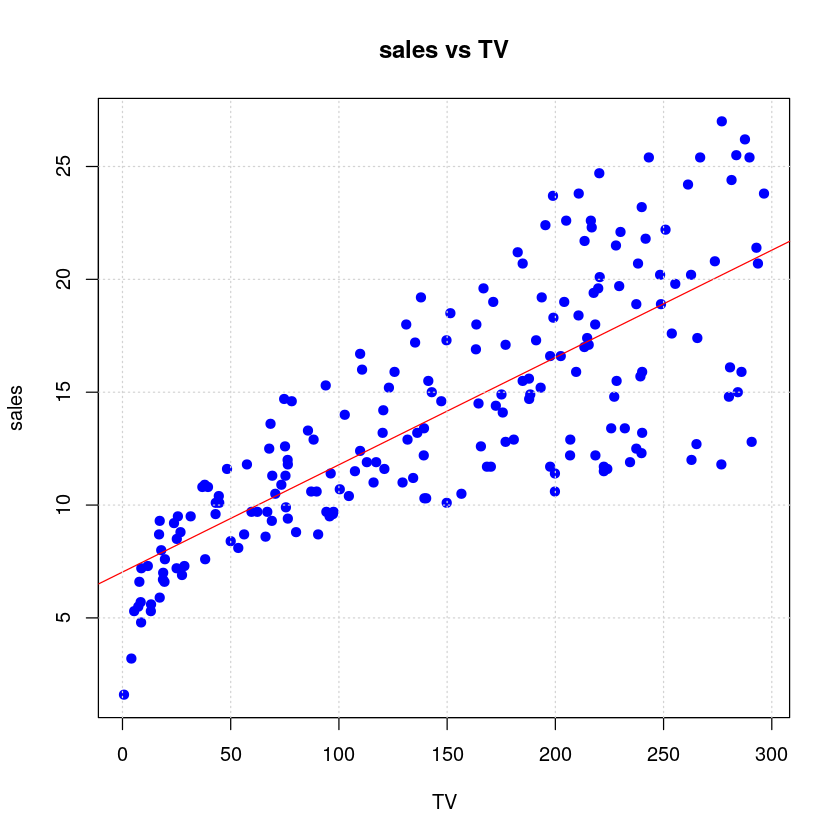

In [17]:
TV <- lm(adv$sales ~ adv$TV)
summary(TV)
plot(adv$TV, adv$sales, xlab = 'TV', ylab = 'sales', main = 'sales vs TV', pch = 19, col = 'blue')
abline(TV, col = 'red')
grid()


Call:
lm(formula = adv$sales ~ adv$newspaper)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2272  -3.3873  -0.8392   3.5059  12.7751 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   12.35141    0.62142   19.88  < 2e-16 ***
adv$newspaper  0.05469    0.01658    3.30  0.00115 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.092 on 198 degrees of freedom
Multiple R-squared:  0.05212,	Adjusted R-squared:  0.04733 
F-statistic: 10.89 on 1 and 198 DF,  p-value: 0.001148


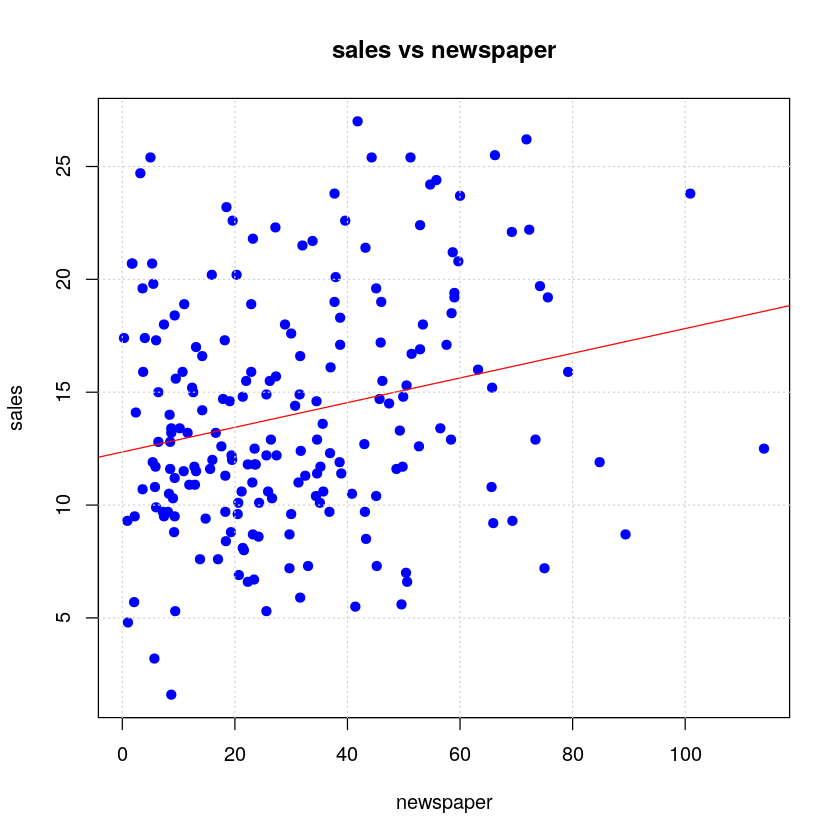

In [18]:
newspaper <- lm(adv$sales ~ adv$newspaper)
summary(newspaper)
plot(adv$newspaper, adv$sales, xlab = 'newspaper', ylab = 'sales', main = 'sales vs newspaper', pch = 19, col = 'blue')
abline(newspaper, col = 'red')
grid()


Call:
lm(formula = adv$sales ~ adv$radio)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
adv$radio    0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


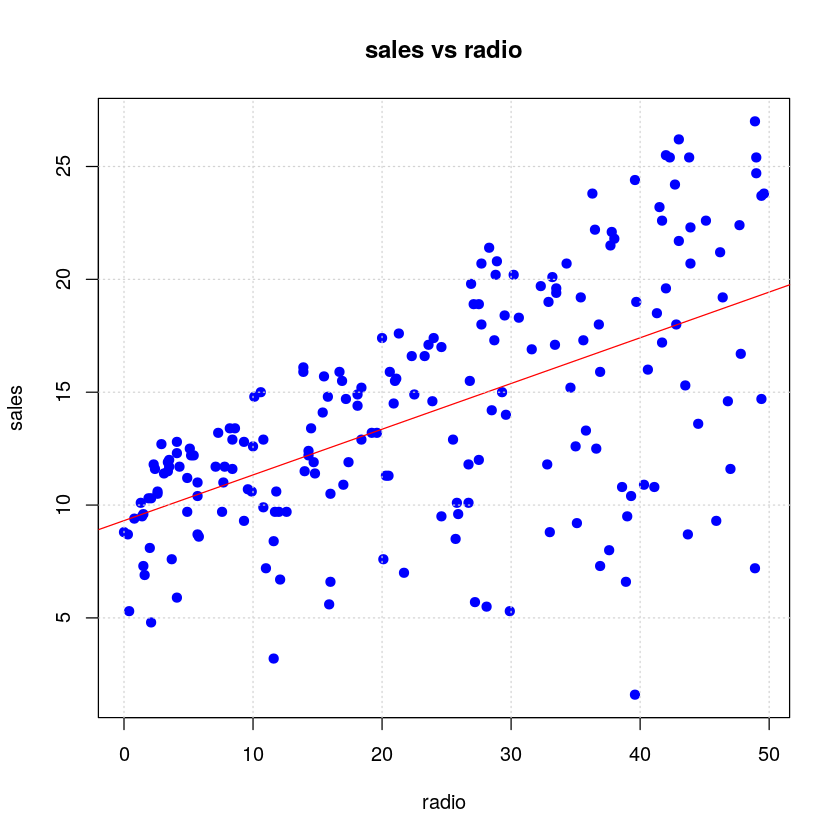

In [19]:
radio <- lm(adv$sales ~ adv$radio)
summary(radio)
plot(adv$radio, adv$sales, xlab = 'radio', ylab = 'sales', main = 'sales vs radio', pch = 19, col = 'blue')
abline(radio, col = 'red')
grid()

***For equivalent Python3 code, go to [simple_linear_regression.py](../simple_linear_regression.py)***

<a name="mulreg"></a>
## Multiple Linear Regression

The regression of multiple predictors takes the form of

$$Y = \beta_{0} + \sum_{i=1}^{p}{\beta_{i}X_{i}} + \epsilon$$

In simple linear regression, we ignore the effect of other predictors while in multiple linear regression, the coefficient represents the average effect on $Y$ of a one unit increase in $X_{j}$, holding all other predictors fixed.

The linear regression considering all the variables together can be done as follows:

In [20]:
mul.fit <- lm(adv$sales ~ ., data = adv)
coef(mul.fit)

(Intercept)           TV        radio    newspaper 
 2.938889369  0.045764645  0.188530017 -0.001037493

In [21]:
summary(mul.fit)


Call:
lm(formula = adv$sales ~ ., data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
radio        0.188530   0.008611  21.893   <2e-16 ***
newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


In [22]:
confint(mul.fit)

,2.5 %,97.5 %
(Intercept),2.32376228,3.55401646
TV,0.04301371,0.04851558
radio,0.17154745,0.20551259
newspaper,-0.01261595,0.01054097


However, while the newspaper regression coefficient estimate
was significantly non-zero, the coefficient estimate for newspaper
in the multiple regression model is close to zero, and the corresponding
p-value is no longer significant, with a value around 0.86.
This illustrates that the simple and multiple regression coefficients can be quite different.

Does it make sense for the multiple regression to suggest no relationship
between sales and newspaper while the simple linear regression implies the
opposite? In fact it does. Consider the correlation matrix for the three
predictor variables and response variable. Notice that the correlation
between radio and newspaper is 0.35. This reveals a
tendency to spend more on newspaper advertising in markets where more
is spent on radio advertising. Now suppose that the multiple regression is
correct and newspaper advertising has no direct impact on sales, but radio
advertising does increase sales. Then in markets where we spend more
on radio our sales will tend to be higher, and as our correlation matrix
shows, we also tend to spend more on newspaper advertising in those same
markets. Hence, in a simple linear regression which only examines sales
versus newspaper, we will observe that higher values of newspaper tend to be
associated with higher values of sales, even though newspaper advertising
does not actually affect sales. So newspaper sales are a surrogate for radio
advertising; newspaper gets “credit” for the effect of radio on sales.

In [23]:
cor(adv)

,TV,radio,newspaper,sales
TV,1.00000000,0.05480866,0.05664787,0.7822244
radio,0.05480866,1.00000000,0.35410375,0.5762226
newspaper,0.05664787,0.35410375,1.00000000,0.2282990
sales,0.78222442,0.57622257,0.22829903,1.0000000
